# Using Pyndamics to Simulate Dynamical Systems

Pyndamics provides a way to describe a dynamical system in terms of the differential equations, or the stock-flow formalism. It is a wrapper around the Scipy odeint function, with further functionality for time plots, phase plots, and vector fields.

Page for this package: [https://code.google.com/p/pyndamics/](https://code.google.com/p/pyndamics/)

In [1]:
from pyndamics import Simulation

## Population of Mice - Exponential Growth

### Specifying the Differential Equation

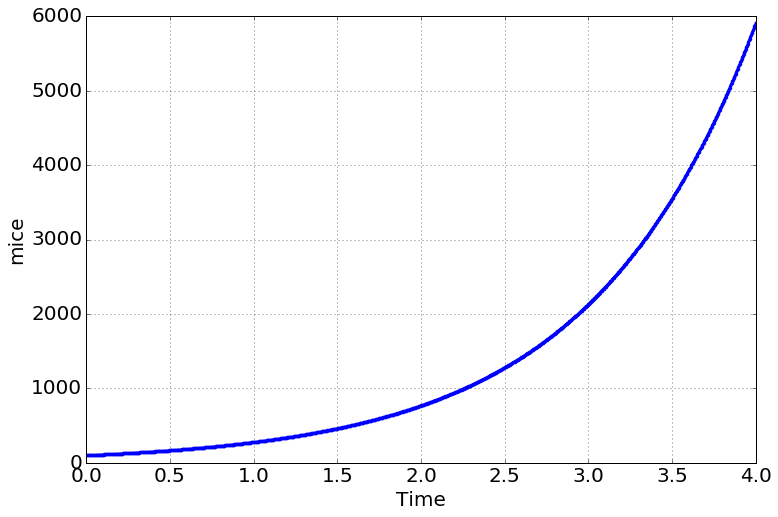

In [2]:
sim=Simulation()   # get a simulation object

sim.add("mice'=b*mice - d*mice",    # the equations
    100,                            # initial value
    plot=True)                      # display a plot

sim.params(b=1.1,d=0.08)

sim.run(0,4)

# fig=sim.figures[0]
# fig.savefig('mice.pdf')
# fig.savefig('mice.png')

### Specifying the Inflows/Outflows

In [3]:
sim=Simulation()   # get a simulation object

sim.stock("mice",100,plot=False)
sim.inflow("mice","b*mice")
sim.outflow("mice","d*mice")

sim.params(b=1.1,d=0.08)

sim.run(0,4)

### Plotting Manually

In [5]:
from pylab import plot,xlabel,ylabel

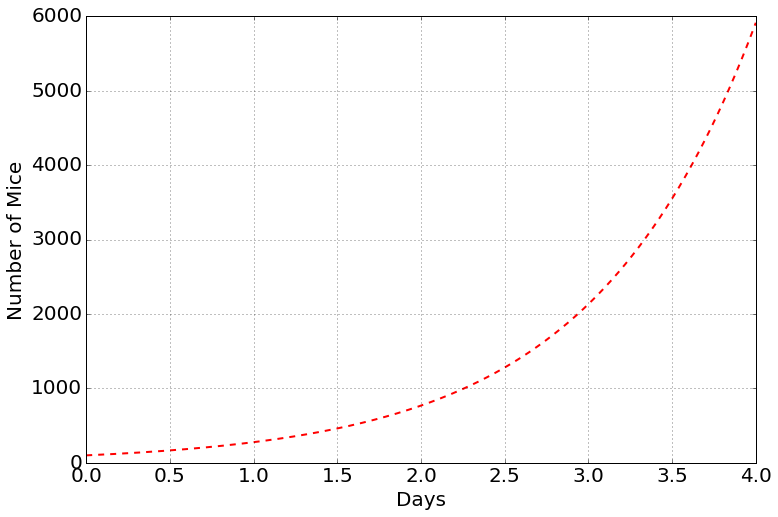

In [6]:
x,y=sim.t,sim.mice
plot(x,y,'r--')
xlabel('Days')
ylabel('Number of Mice')

## Predator-Prey Dynamics

deer'=r*deer*(1-deer/K)-c*deer*wolf
wolf'=-Wd*wolf+D*deer*wolf
r=0.25
c=0.005
Wd=0.3
D=0.001
K=inf



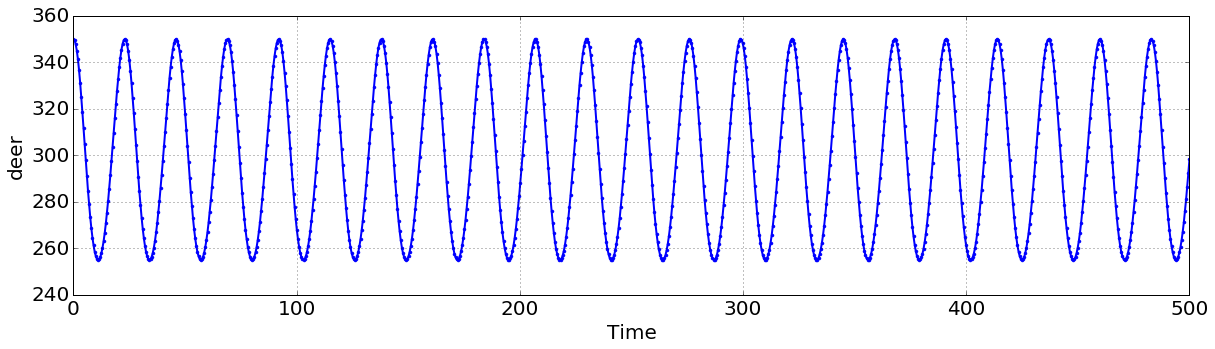

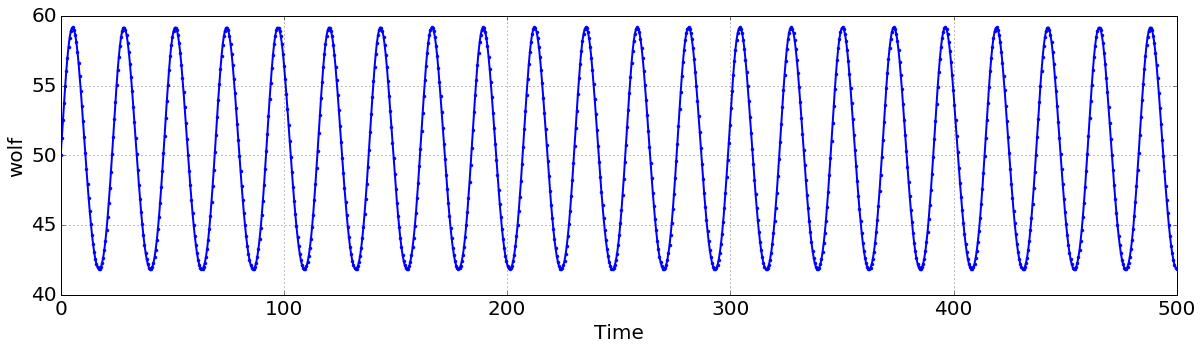

In [8]:
sim=Simulation()
sim.figsize=(20,5)

sim.add("deer' = r*deer*(1-deer/K)-c*deer*wolf",
                initial_value=350,
                plot=True)

sim.add("wolf' = -Wd*wolf+D*deer*wolf",
                initial_value=50,
                plot=True)

sim.params(r=0.25,D=0.001,c=0.005,Wd=0.3,K=1e500)

print(sim.equations())
sim.run(0,500)

# fig=sim.figures[0]
# fig.savefig('predprey_dynamics1.pdf')
# fig.savefig('predprey_dynamics1.png')

# fig=sim.figures[1]
# fig.savefig('predprey_dynamics2.pdf')
# fig.savefig('predprey_dynamics2.png')

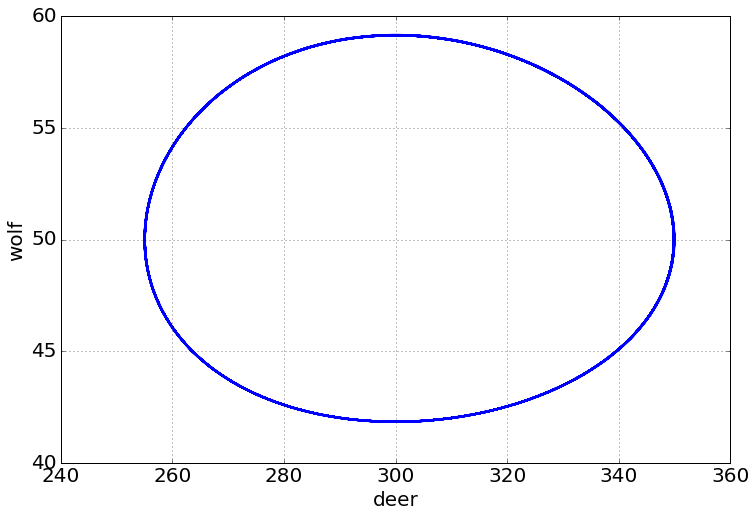

In [9]:
from pyndamics import phase_plot
phase_plot(sim,'deer','wolf')

# fig=gcf()
# fig.savefig('predprey_phase.pdf')
# fig.savefig('predprey_phase.png')

## Exponential vs Logistic

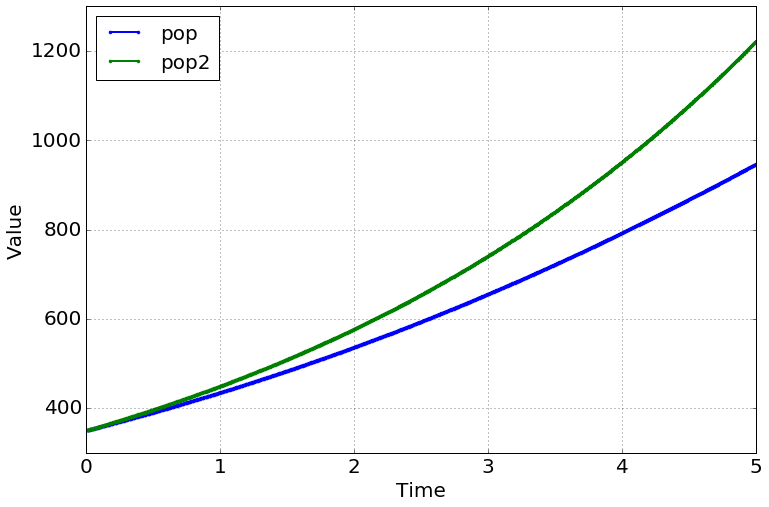

In [10]:
sim=Simulation()

# logistic growth
sim.add("pop' = r*pop*(1-pop/K)",
                initial_value=350,
                plot=1)

# exponential growth
sim.add("pop2' = r*pop2",
                initial_value=350,
                plot=1)


sim.params(r=0.25,K=3000)

sim.run(0,5)


## Damped Spring - Second-order Differential Equations

When specifying the initial conditions for a 2nd-order equation, you need to specify the value of the variable (e.g. position) and its first derivative (e.g. velocity).  The simulator automatically changes the equations into a set of 1st-order equations.

x'=x_p_
x_p_'=-k*x/m -b*x_p_
b=0.5
m=1.0
k=1.0



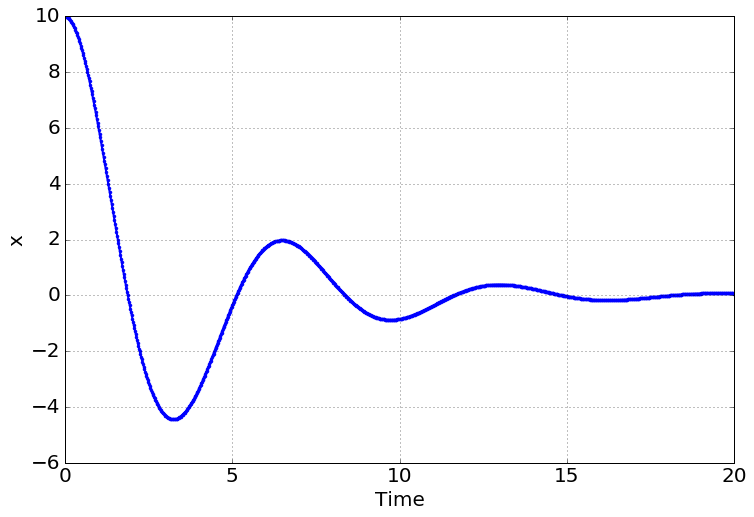

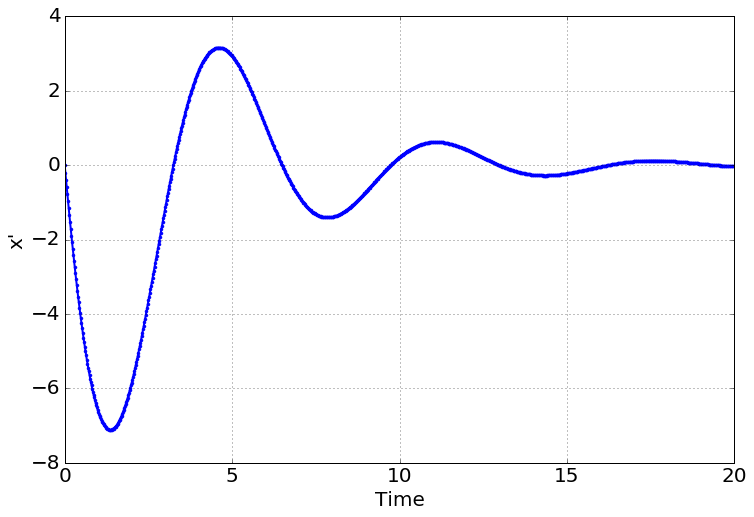

In [12]:
sim=Simulation()
sim.add("x''=-k*x/m -b*x'",[10,0],plot=True)
sim.params(k=1.0,m=1.0,b=0.5)
print(sim.equations())
sim.run(0,20)

## Vector Field Example

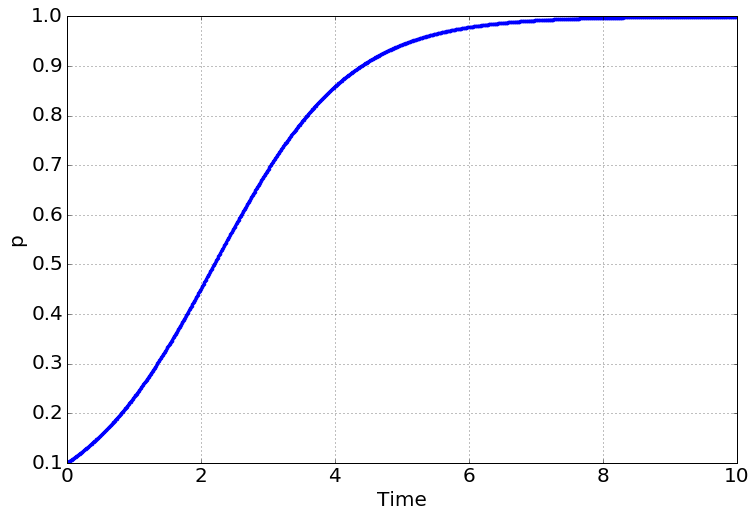

In [13]:
sim=Simulation()
sim.add("p'=p*(1-p)",0.1,plot=True)
sim.run(0,10)

Arrows scaled by the magnitude...

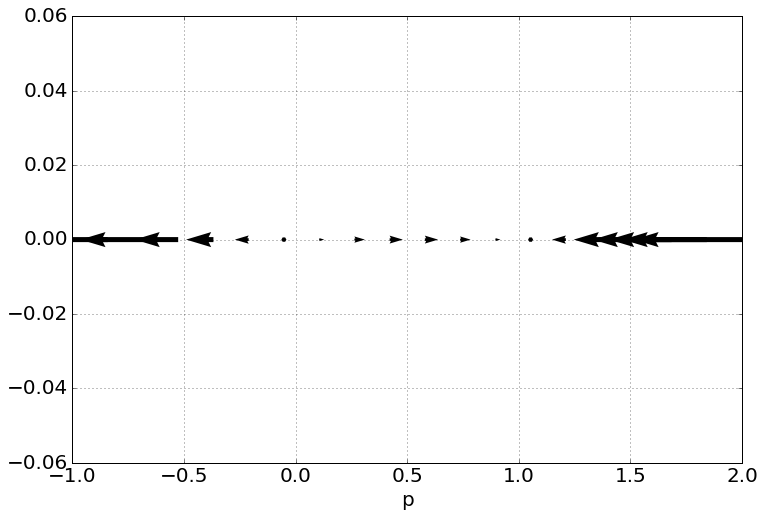

In [15]:
from pyndamics import vector_field
from pylab import linspace
vector_field(sim,p=linspace(-1,2,20))

Arrows rescaled to constant value...

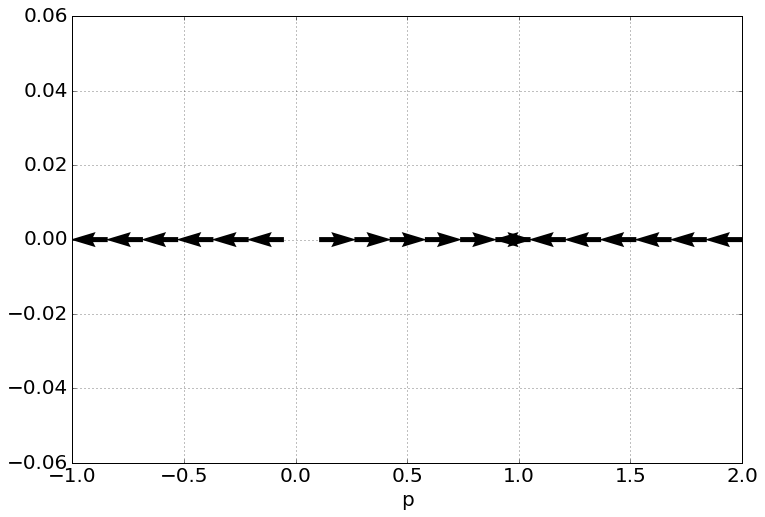

In [16]:
vector_field(sim,rescale=True,p=linspace(-1,2,20))

## The Lorenz System

[http://en.wikipedia.org/wiki/Lorenz_system](http://en.wikipedia.org/wiki/Lorenz_system)


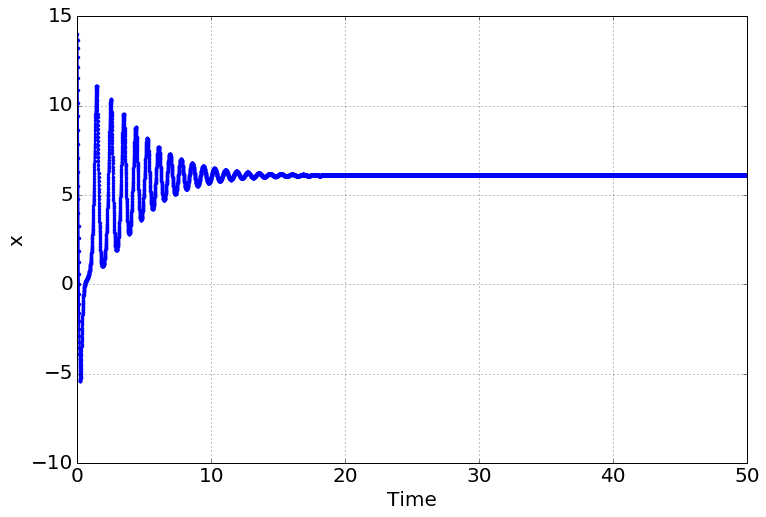

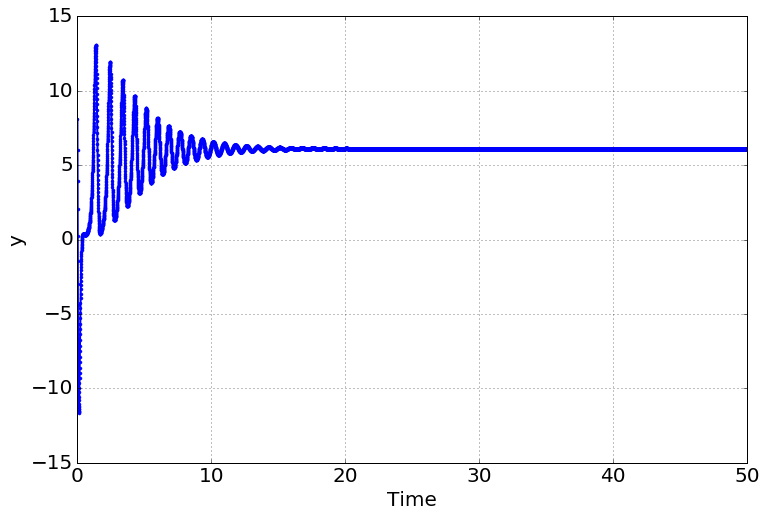

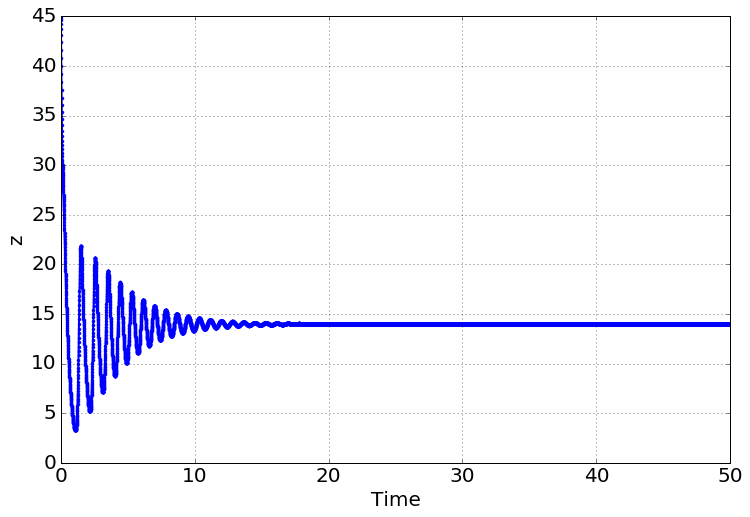

In [17]:
sim=Simulation()
sim.add("x'=sigma*(y-x)",14,plot=True)
sim.add("y'=x*(rho-z)-y",8.1,plot=True)
sim.add("z'=x*y-beta*z",45,plot=True)
sim.params(sigma=10,beta=8.0/3,rho=15)
sim.run(0,50,num_iterations=10000)  # increase the resolution

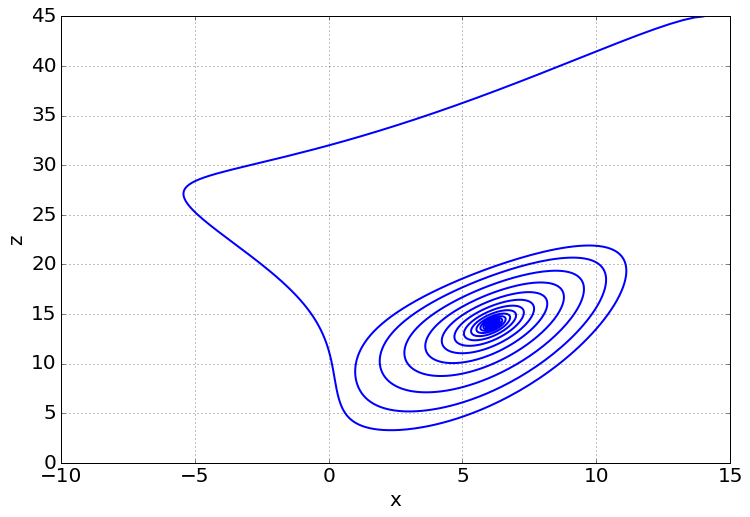

In [18]:
phase_plot(sim,'x','z')

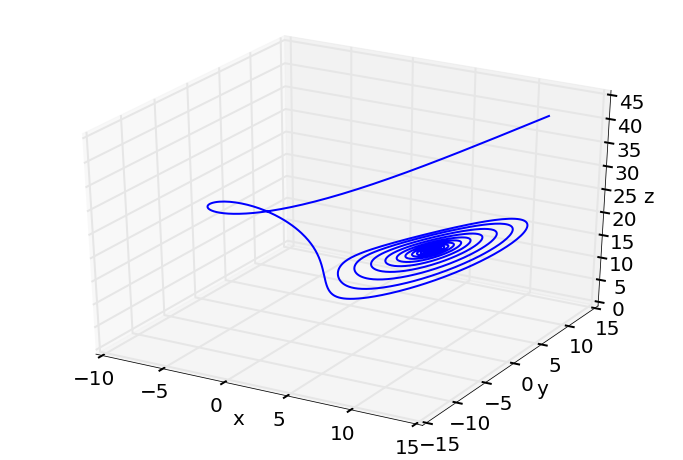

In [19]:
phase_plot(sim,'x','y','z')

## Systems of Coupled Equations

Here I show a proof-of-concept specification of a coupled system.  It isn't optimized, but is ok for small problems.  The example comes from the SciPy Cookbook: http://wiki.scipy.org/Cookbook/CoupledSpringMassSystem

### First, the manual way...

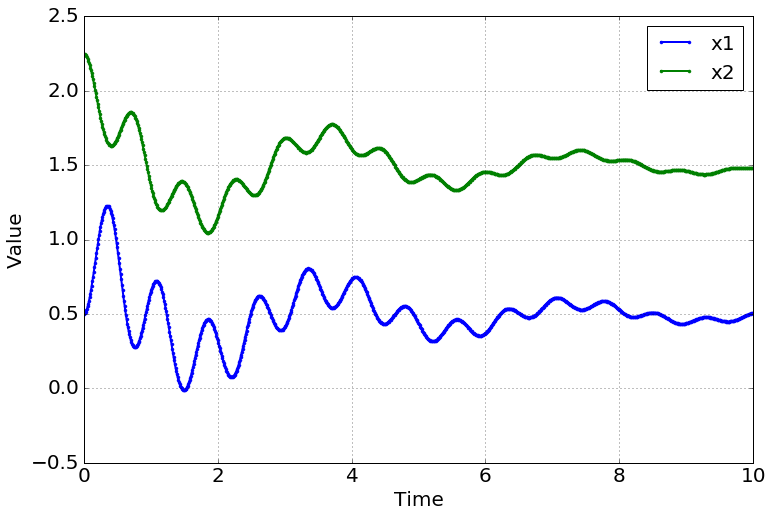

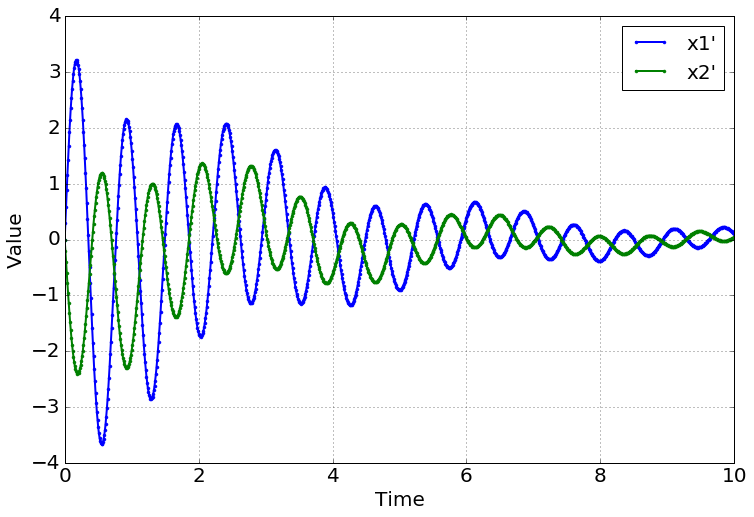

In [20]:
sim=Simulation()
sim.add("x1''=(-b1 * x1' - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1",[0.5,0.0],plot=[1,2])
sim.add("x2''=(-b2 * x2' - k2 * (x2 - x1 - L2)) / m2",[2.25,0.0],plot=[1,2])
sim.params( m1 = 1.0, # masses
            m2 = 1.5, # masses
            k1 = 8.0, # Spring constants
            k2 = 40.0,
            L1 = 0.5, # Natural lengths
            L2 = 1.0,
            b1 = 0.8, # Friction coefficients
            b2 = 0.5,
        )


sim.run(0,10) 

### Now with a bit of a convenient notation...

Here are the equations:
x0'=x0_p_
x0_p_'=(-b0 * x0_p_ - k0 * (x0 -x_1 -L0) + k1 * (x1 - x0 - L1)) / m0
x1'=x1_p_
x1_p_'=(-b1 * x1_p_ - k1 * (x1 -x0 -L1) + k_N * (x_N - x1 - L_N)) / m1
L1=1
L0=0.5
b0=0.8
k1=40.0
b1=0.5
x_N=0
L_N=0
m1=1.5
k_N=0
m0=1
x_1=0
k0=8.0



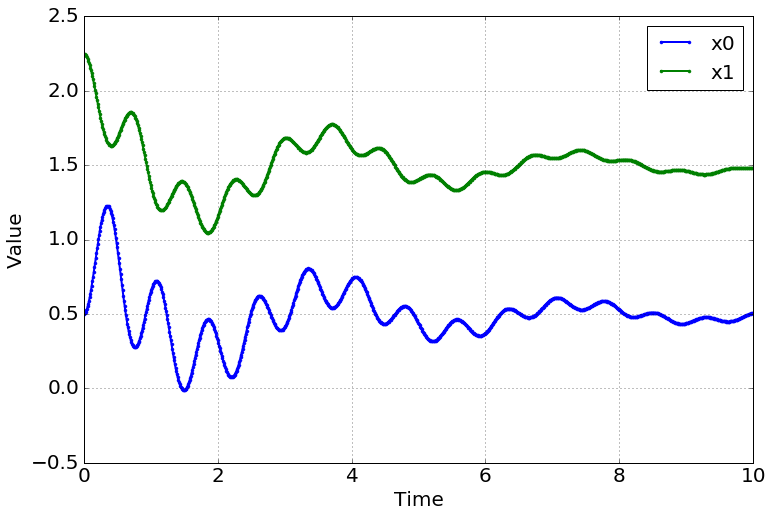

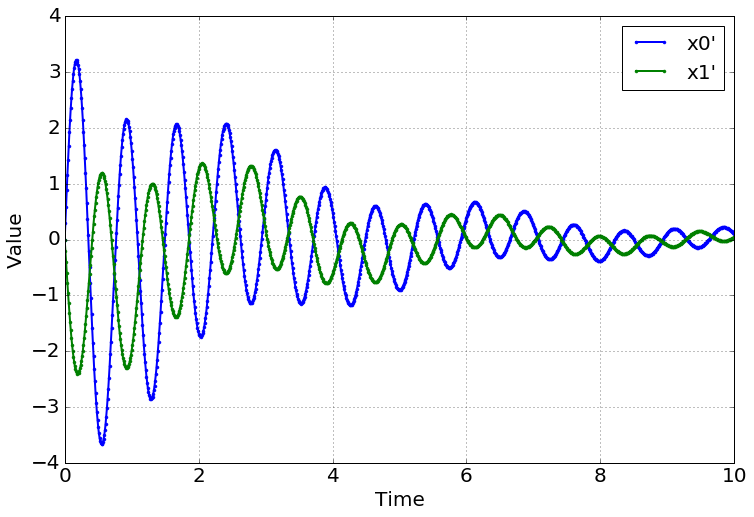

In [22]:
N=2
sim=Simulation()
sim.add_system(N,"x[i]''=(-b[i] * x[i]' - k[i] * (x[i] -x[i-1] -L[i]) + k[i+1] * (x[i+1] - x[i] - L[i+1])) / m[i]",
           [[0.5,0.0],[2.25,0.0]],  # initial conditions
           [[1,2],[1,2]],  # plot arguments
           )

sim.system_params(N,
            k=[8.0,40.0],
            m=[1,1.5],
            L=[0.5,1],
            b=[0.8,0.5],
            
            x_1=0,   # these are the boundary conditions on each side
            x_N=0,
            k_N=0,
            L_N=0,
        )

print("Here are the equations:")
print(sim.equations())
sim.run(0,10) 

### Now with $N=3$

Here are the equations:
x0'=x0_p_
x0_p_'=(-b0 * x0_p_ - k0 * (x0 -x_1 -L0) + k1 * (x1 - x0 - L1)) / m0
x1'=x1_p_
x1_p_'=(-b1 * x1_p_ - k1 * (x1 -x0 -L1) + k2 * (x2 - x1 - L2)) / m1
x2'=x2_p_
x2_p_'=(-b2 * x2_p_ - k2 * (x2 -x1 -L2) + k_N * (x_N - x2 - L_N)) / m2
L1=1
L0=0.5
b0=0.8
b1=0.5
m2=0.5
k1=40.0
m1=1.5
b2=0.1
x_N=0
L_N=0
L2=2
k2=30.0
k_N=0
m0=1
x_1=0
k0=8.0



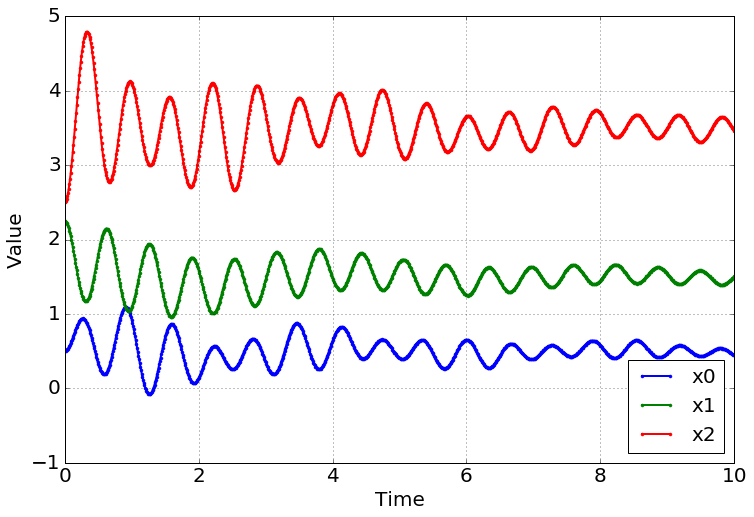

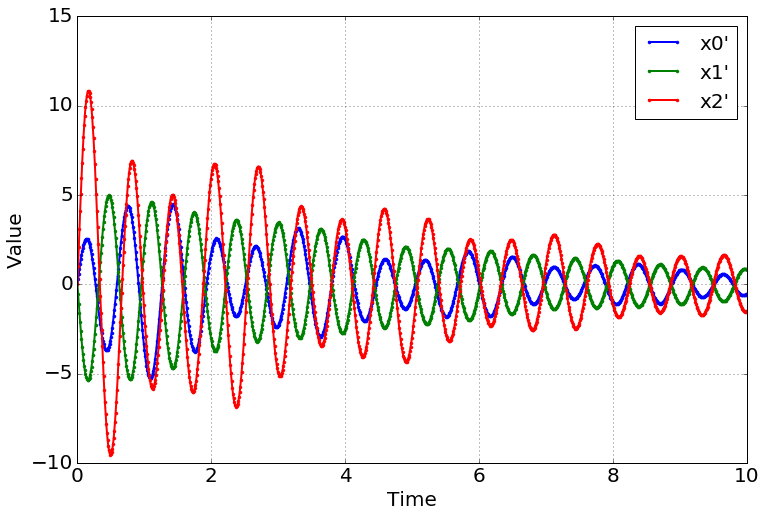

In [23]:
N=3
sim=Simulation()
sim.add_system(N,"x[i]''=(-b[i] * x[i]' - k[i] * (x[i] -x[i-1] -L[i]) + k[i+1] * (x[i+1] - x[i] - L[i+1])) / m[i]",
           [[0.5,0.0],[2.25,0.0],[2.5,0.0]],  # initial conditions
           [[1,2],[1,2],[1,2]],  # plot arguments
           )

sim.system_params(N,
            k=[8.0,40.0,30.0],
            m=[1,1.5,0.5],
            L=[0.5,1,2],
            b=[0.8,0.5,.1],
            
            x_1=0,   # these are the boundary conditions on each side
            x_N=0,
            k_N=0,
            L_N=0,
        )

print("Here are the equations:")
print(sim.equations())
sim.run(0,10) 

## Bifurcation diagram

In [24]:
from pyndamics import Simulation

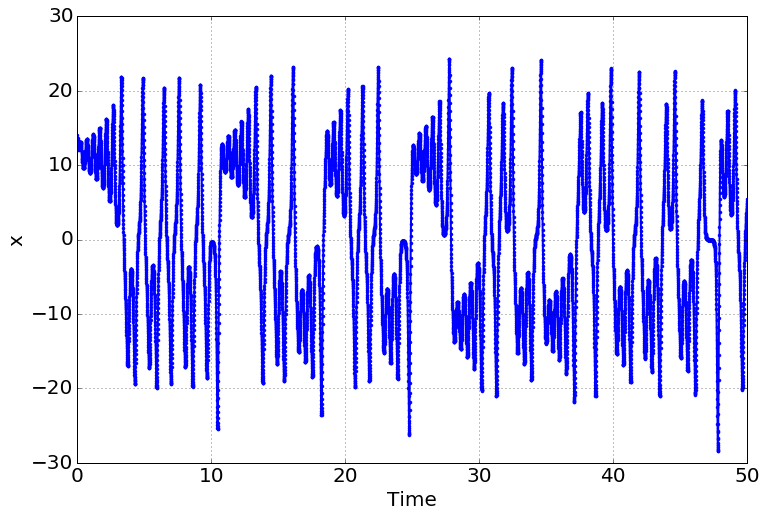

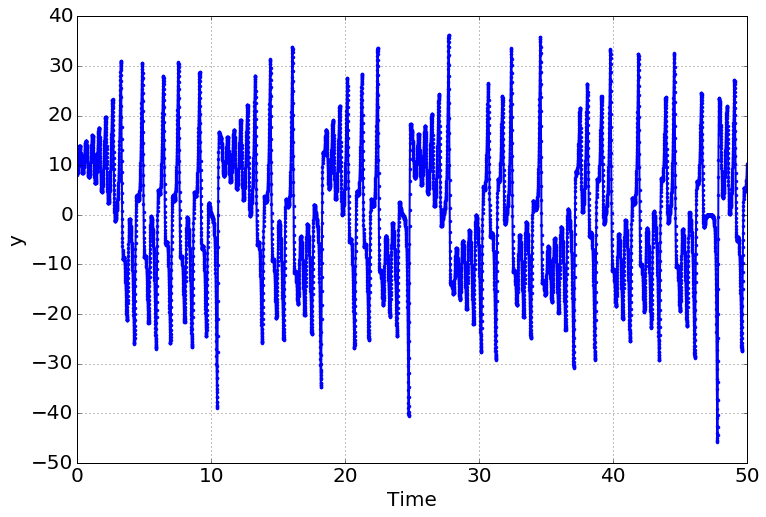

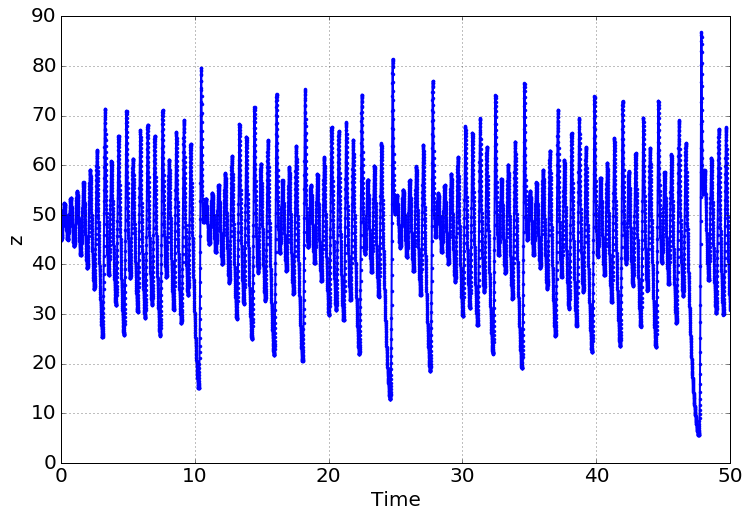

In [25]:
sim=Simulation()
sim.add("x'=sigma*(y-x)",14,plot=True)
sim.add("y'=x*(rho-z)-y",8.1,plot=True)
sim.add("z'=x*y-beta*z",45,plot=True)
sim.params(sigma=10,beta=8.0/3,rho=50)
sim.run(0,50,num_iterations=10000)  # increase the resolution

In [26]:
rho=linspace(10,30,200)
results=sim.repeat(0,50,rho=rho)

In [28]:
from pylab import ones

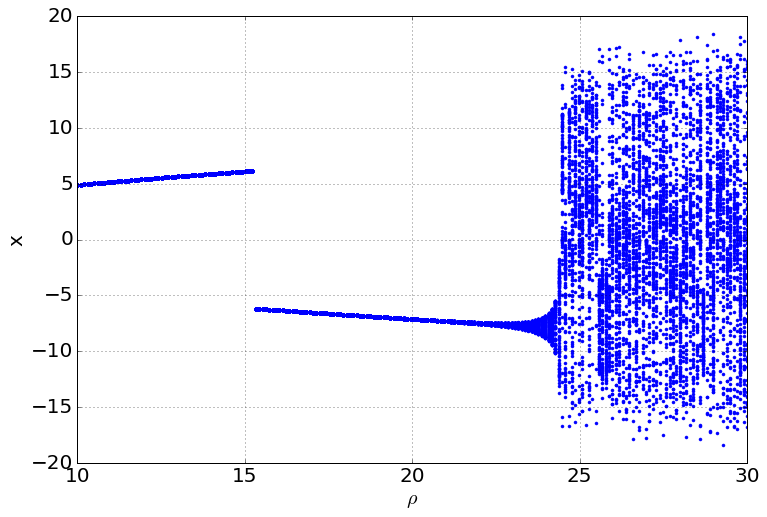

In [29]:
y=[]
x=[]
for i,result in enumerate(results):
    values=result['x'][-100:]
    y.extend(values)
    x.extend(rho[i]*ones(values.shape))
    
plot(x,y,'b.')    
xlabel(r'$\rho$')
ylabel('x')


## Using an externally defined function

many of the standard numpy functions work (sin, cos, tan, tanh, etc...)

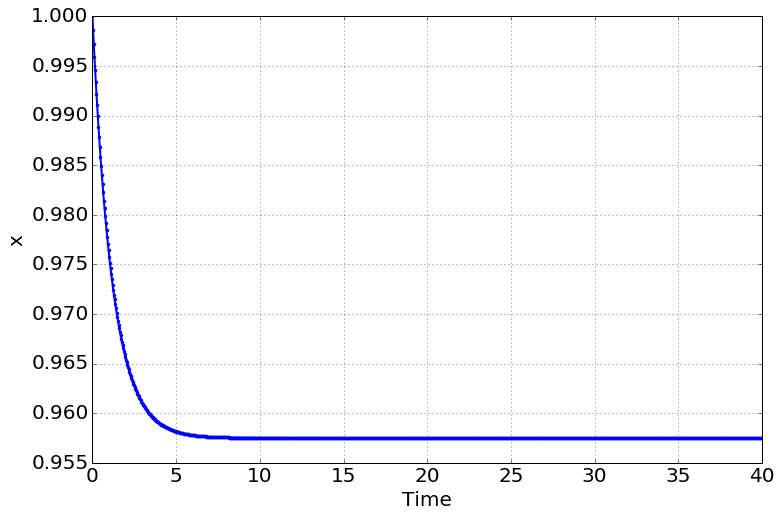

In [30]:
sim=Simulation()   # get a simulation object

sim.add("x' = -x + tanh(a*x)",    # the equations
    1,                            # initial value
    plot=True)                      # display a plot

sim.params(a=2)

sim.run(0,40)

or you can define your own...

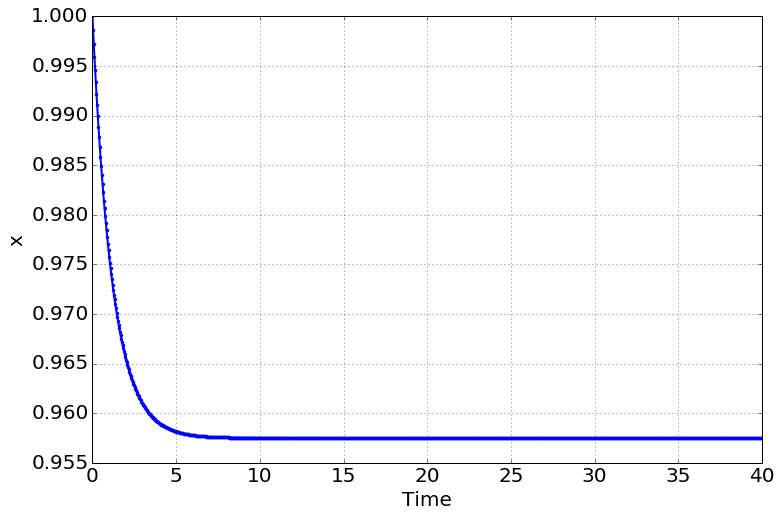

In [32]:
from numpy import tanh
def foo(y):
    return tanh(y)

sim=Simulation()   # get a simulation object

sim.add("x' = -x + foo(a*x)",    # the equations
    1,                            # initial value
    plot=True)                      # display a plot

sim.params(a=2)
sim.functions(foo)
sim.run(0,40)

## Alternate Integrators

By default, pyndamics uses odeint, but you can also specify a few different intergrators.  I have implemented euler, rk2, rk4, and rk45.

deer'=r*deer*(1-deer/K)-c*deer*wolf
wolf'=-Wd*wolf+D*deer*wolf
r=0.25
c=0.005
Wd=0.3
D=0.001
K=inf



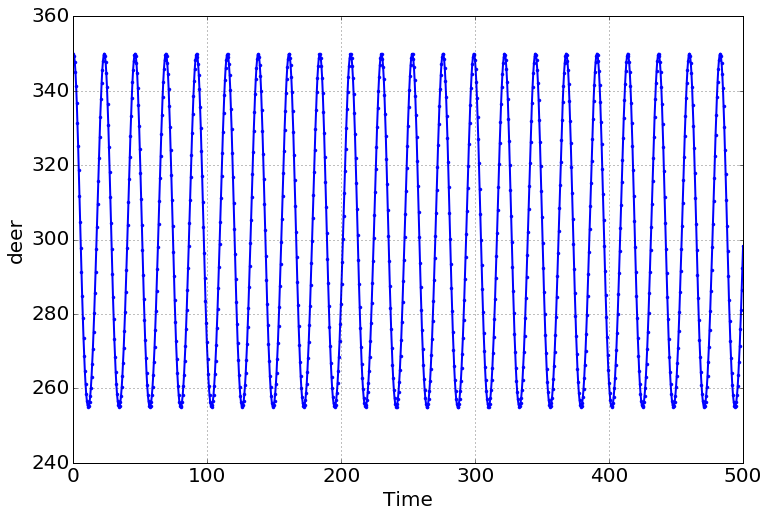

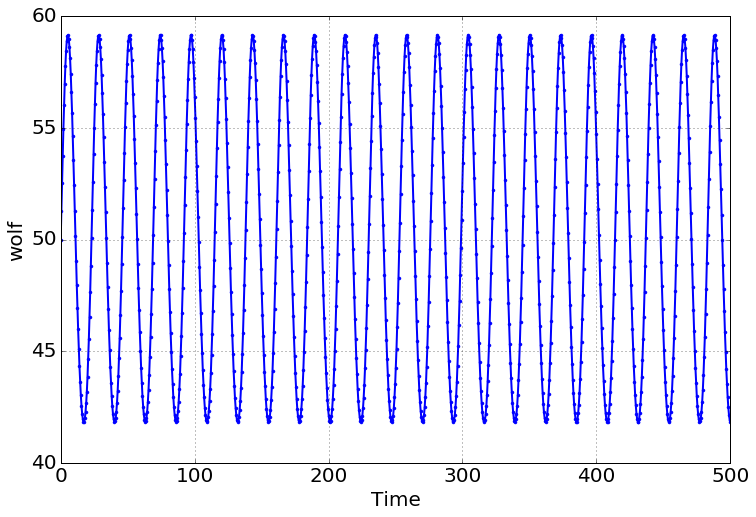

In [34]:
from pyndamics import Simulation
sim=Simulation(method='rk45')

sim.add("deer' = r*deer*(1-deer/K)-c*deer*wolf",
                initial_value=350,
                plot=True)

sim.add("wolf' = -Wd*wolf+D*deer*wolf",
                initial_value=50,
                plot=True)

sim.params(r=0.25,D=0.001,c=0.005,Wd=0.3,K=1e500)

print(sim.equations())
sim.run(0,500)